In [60]:
# Package installs

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
import pandas as pd
from osgeo import gdal,ogr
import glob
import os
from scipy.stats import sem
from itertools import chain

from tqdm import tqdm
import time
import peakdetect

In [2]:
def Transect_data_to_df(DEM_tiff_pathway,T_pathway,T_no):
    DEM_tiff_pathway = DEM_tiff_pathway
    layer = gdal.Open(DEM_tiff_pathway)
    gt =layer.GetGeoTransform()
    bands = layer.RasterCount
#     print(bands)
#     print(gt)

    def Val_raster(x,y,layer,bands,gt):
        col=[]
        px = int((x - gt[0]) / gt[1])
        py =int((y - gt[3]) / gt[5])
        for j in range(bands):
            band = layer.GetRasterBand(j+1)
            data = band.ReadAsArray(px,py, 1, 1)
            col.append(data[0][0])
        return col

    # creation of an empty ogr linestring to handle all possible segments of a line with  Union (combining the segements)
    profilogr = ogr.Geometry(ogr.wkbLineString)
    # open the profile shapefile
    attempt = '01'
    
    T_pathway = T_pathway
    T_no = T_no
    
    path = glob.glob(os.path.join('./Data_Folder/',T_pathway))[T_no]
    source = ogr.Open(path)
    cshp = source.GetLayer()
    # union the segments of the line
    for element in cshp:
        geom = element.GetGeometryRef()
        profilogr = profilogr.Union(geom)

    from shapely.wkb import loads
    # transformation in Shapely geometry
    profilshp = loads(profilogr.ExportToWkb())
    # creation the equidistant points on the line with a step of 8m
    lenght=profilshp.length
    REMA_x = []
    REMA_y = []
    REMA_z = []
    # distance of the topographic profile
    REMA_distance = []

    import decimal
    def float_range(start, stop, step):
        while start < stop:
            yield float(start)
            start += decimal.Decimal(step)

    # As REMA is 8m resolution change lenght value to correspond
    for currentdistance  in float_range(0,lenght,8):
        point = profilshp.interpolate(currentdistance)
        xp,yp=point.x, point.y
        REMA_x.append(xp)
        REMA_y.append(yp)
        REMA_z.append(Val_raster(xp,yp,layer, bands,gt)[0])
        REMA_distance.append(currentdistance)

    df = pd.DataFrame()

    df['REMA_x'] = REMA_x
    df['REMA_y'] = REMA_y
    df['REMA_z'] = REMA_z
    df['REMA_distance'] = REMA_distance
    

    return df
    

In [3]:
# list of transects
## Site A

DEM_pathway = './Wilkes Land merged tiffs.tif'
attempt = '01'
transect_pathway = f'Site_A_T*{attempt}*.shp'

start = time.time()
df1 = Transect_data_to_df(DEM_pathway,transect_pathway,0)
df2 = Transect_data_to_df(DEM_pathway,transect_pathway,1)
df3 = Transect_data_to_df(DEM_pathway,transect_pathway,2)
df4 = Transect_data_to_df(DEM_pathway,transect_pathway,3)
df5 = Transect_data_to_df(DEM_pathway,transect_pathway,4)
df6 = Transect_data_to_df(DEM_pathway,transect_pathway,5)
df7 = Transect_data_to_df(DEM_pathway,transect_pathway,6)
df8 = Transect_data_to_df(DEM_pathway,transect_pathway,7)
df9 = Transect_data_to_df(DEM_pathway,transect_pathway,8)
df10 = Transect_data_to_df(DEM_pathway,transect_pathway,9)
df11 = Transect_data_to_df(DEM_pathway,transect_pathway,10)
df12 = Transect_data_to_df(DEM_pathway,transect_pathway,11)
df13 = Transect_data_to_df(DEM_pathway,transect_pathway,12)
df14 = Transect_data_to_df(DEM_pathway,transect_pathway,13)
df15 = Transect_data_to_df(DEM_pathway,transect_pathway,14)
df16 = Transect_data_to_df(DEM_pathway,transect_pathway,15)
df17 = Transect_data_to_df(DEM_pathway,transect_pathway,16)
df18 = Transect_data_to_df(DEM_pathway,transect_pathway,17)
df19 = Transect_data_to_df(DEM_pathway,transect_pathway,18)
df20 = Transect_data_to_df(DEM_pathway,transect_pathway,19)
df21 = Transect_data_to_df(DEM_pathway,transect_pathway,20)
df22 = Transect_data_to_df(DEM_pathway,transect_pathway,21)
df23 = Transect_data_to_df(DEM_pathway,transect_pathway,22)
df24 = Transect_data_to_df(DEM_pathway,transect_pathway,23)
df25 = Transect_data_to_df(DEM_pathway,transect_pathway,24)

time.time()
print("time to run (minutes): ", (time.time() - start)/60)



time to run (minutes):  1.6734838167826334


In [107]:
# list of transects
## Site B

DEM_pathway = './SiteB.tif'
attempt = '01'
transect_pathway = f'Site_B_T*{attempt}*.shp'

start = time.time()
SB_df1 = Transect_data_to_df(DEM_pathway,transect_pathway,0)
SB_df2 = Transect_data_to_df(DEM_pathway,transect_pathway,1)
SB_df3 = Transect_data_to_df(DEM_pathway,transect_pathway,2)
SB_df4 = Transect_data_to_df(DEM_pathway,transect_pathway,3)
SB_df5 = Transect_data_to_df(DEM_pathway,transect_pathway,4)
SB_df6 = Transect_data_to_df(DEM_pathway,transect_pathway,5)
SB_df7 = Transect_data_to_df(DEM_pathway,transect_pathway,6)
SB_df8 = Transect_data_to_df(DEM_pathway,transect_pathway,7)
SB_df9 = Transect_data_to_df(DEM_pathway,transect_pathway,8)
SB_df10 = Transect_data_to_df(DEM_pathway,transect_pathway,9)
SB_df11 = Transect_data_to_df(DEM_pathway,transect_pathway,10)
SB_df12 = Transect_data_to_df(DEM_pathway,transect_pathway,11)
SB_df13 = Transect_data_to_df(DEM_pathway,transect_pathway,12)
SB_df14 = Transect_data_to_df(DEM_pathway,transect_pathway,13)
SB_df15 = Transect_data_to_df(DEM_pathway,transect_pathway,14)
SB_df16 = Transect_data_to_df(DEM_pathway,transect_pathway,15)
SB_df17 = Transect_data_to_df(DEM_pathway,transect_pathway,16)
SB_df18 = Transect_data_to_df(DEM_pathway,transect_pathway,17)
SB_df19 = Transect_data_to_df(DEM_pathway,transect_pathway,18)
SB_df20 = Transect_data_to_df(DEM_pathway,transect_pathway,19)
SB_df21 = Transect_data_to_df(DEM_pathway,transect_pathway,20)
SB_df22 = Transect_data_to_df(DEM_pathway,transect_pathway,21)
SB_df23 = Transect_data_to_df(DEM_pathway,transect_pathway,22)
SB_df24 = Transect_data_to_df(DEM_pathway,transect_pathway,23)
SB_df25 = Transect_data_to_df(DEM_pathway,transect_pathway,24)

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

time to run (minutes):  3.12098343372345


In [164]:
# list of transects
## Site C

DEM_pathway = './44_42_8m_dem.tif'
attempt = '01'
transect_pathway = f'Site_C_T*{attempt}*.shp'

start = time.time()
SC_df1 = Transect_data_to_df(DEM_pathway,transect_pathway,0)
#SC_df2 = Transect_data_to_df(DEM_pathway,transect_pathway,1)
#SC_df3 = Transect_data_to_df(DEM_pathway,transect_pathway,2)
SC_df4 = Transect_data_to_df(DEM_pathway,transect_pathway,3)
SC_df5 = Transect_data_to_df(DEM_pathway,transect_pathway,4)
SC_df6 = Transect_data_to_df(DEM_pathway,transect_pathway,5)
SC_df7 = Transect_data_to_df(DEM_pathway,transect_pathway,6)
#SC_df8 = Transect_data_to_df(DEM_pathway,transect_pathway,7)
SC_df9 = Transect_data_to_df(DEM_pathway,transect_pathway,8)
SC_df10 = Transect_data_to_df(DEM_pathway,transect_pathway,9)
SC_df11 = Transect_data_to_df(DEM_pathway,transect_pathway,10)
SC_df12 = Transect_data_to_df(DEM_pathway,transect_pathway,11)
SC_df13 = Transect_data_to_df(DEM_pathway,transect_pathway,12)
SC_df14 = Transect_data_to_df(DEM_pathway,transect_pathway,13)
SC_df15 = Transect_data_to_df(DEM_pathway,transect_pathway,14)
SC_df16 = Transect_data_to_df(DEM_pathway,transect_pathway,15)
SC_df17 = Transect_data_to_df(DEM_pathway,transect_pathway,16)
SC_df18 = Transect_data_to_df(DEM_pathway,transect_pathway,17)
SC_df19 = Transect_data_to_df(DEM_pathway,transect_pathway,18)
SC_df20 = Transect_data_to_df(DEM_pathway,transect_pathway,19)
SC_df21 = Transect_data_to_df(DEM_pathway,transect_pathway,20)
SC_df22 = Transect_data_to_df(DEM_pathway,transect_pathway,21)
SC_df23 = Transect_data_to_df(DEM_pathway,transect_pathway,22)
SC_df24 = Transect_data_to_df(DEM_pathway,transect_pathway,23)
SC_df25 = Transect_data_to_df(DEM_pathway,transect_pathway,24)
SC_df26 = Transect_data_to_df(DEM_pathway,transect_pathway,25)
SC_df27 = Transect_data_to_df(DEM_pathway,transect_pathway,26)
SC_df28 = Transect_data_to_df(DEM_pathway,transect_pathway,27)
SC_df29 = Transect_data_to_df(DEM_pathway,transect_pathway,28)
SC_df30 = Transect_data_to_df(DEM_pathway,transect_pathway,29)
SC_df31 = Transect_data_to_df(DEM_pathway,transect_pathway,30)
SC_df32 = Transect_data_to_df(DEM_pathway,transect_pathway,31)
SC_df33 = Transect_data_to_df(DEM_pathway,transect_pathway,32)
SC_df34 = Transect_data_to_df(DEM_pathway,transect_pathway,33)
SC_df35 = Transect_data_to_df(DEM_pathway,transect_pathway,34)
SC_df36 = Transect_data_to_df(DEM_pathway,transect_pathway,35)
SC_df37 = Transect_data_to_df(DEM_pathway,transect_pathway,36)
SC_df38 = Transect_data_to_df(DEM_pathway,transect_pathway,37)
SC_df39 = Transect_data_to_df(DEM_pathway,transect_pathway,38)
SC_df40 = Transect_data_to_df(DEM_pathway,transect_pathway,39)
#SC_df41 = Transect_data_to_df(DEM_pathway,transect_pathway,40)


time.time()
print("time to run (minutes): ", (time.time() - start)/60)

time to run (minutes):  0.6404354691505432


In [165]:
# list of transects
## Site D

DEM_pathway = './Site D extended area.tif'
attempt = '01'
transect_pathway = f'Site_D_T*{attempt}*.shp'

start = time.time()
SD_df1 = Transect_data_to_df(DEM_pathway,transect_pathway,0)
SD_df2 = Transect_data_to_df(DEM_pathway,transect_pathway,1)
SD_df3 = Transect_data_to_df(DEM_pathway,transect_pathway,2)
SD_df4 = Transect_data_to_df(DEM_pathway,transect_pathway,3)
SD_df5 = Transect_data_to_df(DEM_pathway,transect_pathway,4)
SD_df6 = Transect_data_to_df(DEM_pathway,transect_pathway,5)
SD_df7 = Transect_data_to_df(DEM_pathway,transect_pathway,6)
SD_df8 = Transect_data_to_df(DEM_pathway,transect_pathway,7)
SD_df9 = Transect_data_to_df(DEM_pathway,transect_pathway,8)
SD_df10 = Transect_data_to_df(DEM_pathway,transect_pathway,9)
SD_df11 = Transect_data_to_df(DEM_pathway,transect_pathway,10)
SD_df12 = Transect_data_to_df(DEM_pathway,transect_pathway,11)
SD_df13 = Transect_data_to_df(DEM_pathway,transect_pathway,12)
SD_df14 = Transect_data_to_df(DEM_pathway,transect_pathway,13)
SD_df15 = Transect_data_to_df(DEM_pathway,transect_pathway,14)
SD_df16 = Transect_data_to_df(DEM_pathway,transect_pathway,15)
SD_df17 = Transect_data_to_df(DEM_pathway,transect_pathway,16)
SD_df18 = Transect_data_to_df(DEM_pathway,transect_pathway,17)
SD_df19 = Transect_data_to_df(DEM_pathway,transect_pathway,18)
SD_df20 = Transect_data_to_df(DEM_pathway,transect_pathway,19)
SD_df21 = Transect_data_to_df(DEM_pathway,transect_pathway,20)
SD_df22 = Transect_data_to_df(DEM_pathway,transect_pathway,21)
SD_df23 = Transect_data_to_df(DEM_pathway,transect_pathway,22)
SD_df24 = Transect_data_to_df(DEM_pathway,transect_pathway,23)
SD_df25 = Transect_data_to_df(DEM_pathway,transect_pathway,24)
SD_df26 = Transect_data_to_df(DEM_pathway,transect_pathway,25)
SD_df27 = Transect_data_to_df(DEM_pathway,transect_pathway,26)
SD_df28 = Transect_data_to_df(DEM_pathway,transect_pathway,27)
SD_df29 = Transect_data_to_df(DEM_pathway,transect_pathway,28)
SD_df30 = Transect_data_to_df(DEM_pathway,transect_pathway,29)
SD_df31 = Transect_data_to_df(DEM_pathway,transect_pathway,30)
SD_df32 = Transect_data_to_df(DEM_pathway,transect_pathway,31)
SD_df33 = Transect_data_to_df(DEM_pathway,transect_pathway,32)
SD_df34 = Transect_data_to_df(DEM_pathway,transect_pathway,33)
SD_df35 = Transect_data_to_df(DEM_pathway,transect_pathway,34)
SD_df36 = Transect_data_to_df(DEM_pathway,transect_pathway,35)
SD_df37 = Transect_data_to_df(DEM_pathway,transect_pathway,36)
SD_df38 = Transect_data_to_df(DEM_pathway,transect_pathway,37)
SD_df39 = Transect_data_to_df(DEM_pathway,transect_pathway,38)
SD_df40 = Transect_data_to_df(DEM_pathway,transect_pathway,39)
SD_df41 = Transect_data_to_df(DEM_pathway,transect_pathway,40)
SD_df42 = Transect_data_to_df(DEM_pathway,transect_pathway,41)
SD_df43 = Transect_data_to_df(DEM_pathway,transect_pathway,42)
SD_df44 = Transect_data_to_df(DEM_pathway,transect_pathway,43)
SD_df45 = Transect_data_to_df(DEM_pathway,transect_pathway,44)
SD_df46 = Transect_data_to_df(DEM_pathway,transect_pathway,45)
SD_df47 = Transect_data_to_df(DEM_pathway,transect_pathway,46)
SD_df48 = Transect_data_to_df(DEM_pathway,transect_pathway,47)
SD_df49 = Transect_data_to_df(DEM_pathway,transect_pathway,48)
SD_df50 = Transect_data_to_df(DEM_pathway,transect_pathway,49)

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

time to run (minutes):  0.27940573294957477


In [166]:
# list of transects
## Site E

DEM_pathway = './Site E ; near Ross ice shelf.tif'
attempt = '01'
transect_pathway = f'Site_E_T*{attempt}*.shp'

start = time.time()
SE_df1 = Transect_data_to_df(DEM_pathway,transect_pathway,0)
SE_df2 = Transect_data_to_df(DEM_pathway,transect_pathway,1)
SE_df3 = Transect_data_to_df(DEM_pathway,transect_pathway,2)
SE_df4 = Transect_data_to_df(DEM_pathway,transect_pathway,3)
SE_df5 = Transect_data_to_df(DEM_pathway,transect_pathway,4)
SE_df6 = Transect_data_to_df(DEM_pathway,transect_pathway,5)
SE_df7 = Transect_data_to_df(DEM_pathway,transect_pathway,6)
SE_df8 = Transect_data_to_df(DEM_pathway,transect_pathway,7)
SE_df9 = Transect_data_to_df(DEM_pathway,transect_pathway,8)
SE_df10 = Transect_data_to_df(DEM_pathway,transect_pathway,9)
SE_df11 = Transect_data_to_df(DEM_pathway,transect_pathway,10)
SE_df12 = Transect_data_to_df(DEM_pathway,transect_pathway,11)
SE_df13 = Transect_data_to_df(DEM_pathway,transect_pathway,12)
SE_df14 = Transect_data_to_df(DEM_pathway,transect_pathway,13)
SE_df15 = Transect_data_to_df(DEM_pathway,transect_pathway,14)
SE_df16 = Transect_data_to_df(DEM_pathway,transect_pathway,15)
SE_df17 = Transect_data_to_df(DEM_pathway,transect_pathway,16)
SE_df18 = Transect_data_to_df(DEM_pathway,transect_pathway,17)
SE_df19 = Transect_data_to_df(DEM_pathway,transect_pathway,18)
SE_df20 = Transect_data_to_df(DEM_pathway,transect_pathway,19)
SE_df21 = Transect_data_to_df(DEM_pathway,transect_pathway,20)
SE_df22 = Transect_data_to_df(DEM_pathway,transect_pathway,21)
SE_df23 = Transect_data_to_df(DEM_pathway,transect_pathway,22)
SE_df24 = Transect_data_to_df(DEM_pathway,transect_pathway,23)
SE_df25 = Transect_data_to_df(DEM_pathway,transect_pathway,24)
SE_df26 = Transect_data_to_df(DEM_pathway,transect_pathway,25)
SE_df27 = Transect_data_to_df(DEM_pathway,transect_pathway,26)
SE_df28 = Transect_data_to_df(DEM_pathway,transect_pathway,27)
SE_df29 = Transect_data_to_df(DEM_pathway,transect_pathway,28)
SE_df30 = Transect_data_to_df(DEM_pathway,transect_pathway,29)
SE_df31 = Transect_data_to_df(DEM_pathway,transect_pathway,30)
SE_df32 = Transect_data_to_df(DEM_pathway,transect_pathway,31)
SE_df33 = Transect_data_to_df(DEM_pathway,transect_pathway,32)
SE_df34 = Transect_data_to_df(DEM_pathway,transect_pathway,33)
SE_df35 = Transect_data_to_df(DEM_pathway,transect_pathway,34)
SE_df36 = Transect_data_to_df(DEM_pathway,transect_pathway,35)
SE_df37 = Transect_data_to_df(DEM_pathway,transect_pathway,36)
SE_df38 = Transect_data_to_df(DEM_pathway,transect_pathway,37)
SE_df39 = Transect_data_to_df(DEM_pathway,transect_pathway,38)
SE_df40 = Transect_data_to_df(DEM_pathway,transect_pathway,39)
SE_df41 = Transect_data_to_df(DEM_pathway,transect_pathway,40)
SE_df42 = Transect_data_to_df(DEM_pathway,transect_pathway,41)
SE_df43 = Transect_data_to_df(DEM_pathway,transect_pathway,42)
SE_df44 = Transect_data_to_df(DEM_pathway,transect_pathway,43)
SE_df45 = Transect_data_to_df(DEM_pathway,transect_pathway,44)
SE_df46 = Transect_data_to_df(DEM_pathway,transect_pathway,45)
SE_df47 = Transect_data_to_df(DEM_pathway,transect_pathway,46)
SE_df48 = Transect_data_to_df(DEM_pathway,transect_pathway,47)
SE_df49 = Transect_data_to_df(DEM_pathway,transect_pathway,48)
SE_df50 = Transect_data_to_df(DEM_pathway,transect_pathway,49)
SE_df51 = Transect_data_to_df(DEM_pathway,transect_pathway,50)


time.time()
print("time to run (minutes): ", (time.time() - start)/60)

time to run (minutes):  0.2804407000541687


In [394]:
def Peak_trough_finder(All_data_per_site, Site_no):
    
    a = All_data_per_site['REMA_z']
    b = All_data_per_site['REMA_distance'].astype(int)
    
    c = All_data_per_site['REMA_x']
    d = All_data_per_site['REMA_y']

    peaks = peakdetect.peakdetect(a, b,50)
    formatted_peaks_detected = [[x[0], x[1]] for w in peaks for x in w]

    df = pd.DataFrame(formatted_peaks_detected, columns=[('xcoord'), ('ycoord')])
    df_xcoord = df['xcoord'].values.tolist()
    df_ycoord = df['ycoord'].values.tolist()
    
    # Wavelength
    wvl = []
    for i in range(2,len(df)):
        x,y = df_xcoord[i],df_xcoord[i-2]
        diff = x - y
        wvl.append(diff)
        
#     print(wvl)
#     print(len(wvl))

    import math
    test = []
    if Site_no == 2:
        H = math.ceil(len(wvl)/2)
        P = H-1
    elif Site_no == 1:
        H = math.floor(len(wvl)/2)
        P = H-1
    else:
        for i in range(len(wvl)):
            if wvl[i] <= 0:
                test.append(i)

        
    wvl_df = pd.DataFrame(wvl,columns=['WVL'])
    
    if Site_no !=3:
        wvl_df = wvl_df.drop([H,P]).astype(int)
    
    else:
        wvl_df = wvl_df.drop(test).astype(int)
        
    wvl = wvl_df['WVL'].values.tolist()
    
    #print(wvl)
    #print(len(wvl))
        
    # Amplitude
    amp = []
    for i in range(1,len(df)):
        x,y = df_ycoord[i],df_ycoord[i-1]
        if x > y:
            diff = x - y
            amp.append(diff)
        else:
            diff = y - x
            amp.append(diff)
        
    amp = amp[:-1]
#     print(amp)
#     print(len(amp))
    
    amp_df = pd.DataFrame(amp, columns=['AMP'])
    
    if Site_no !=3:
        amp_df = amp_df.drop([H,P])

    else:
        amp_df = amp_df.drop(test)
        
    amp = amp_df['AMP'].values.tolist() 
    #print(amp)
    #print(len(amp))
    
    #####################
    # Now extract position of each amplitude and drop those not needed
    Will_df = df['xcoord']
    Will = Will_df.values.tolist()
        
#     for P in range(len(Will)):
#         T = Will[P]
#         Data_wvl.append(T)
        
    subset = All_data_per_site[All_data_per_site['REMA_distance'].isin(Will)].reset_index()
    #print(subset)
    #print(len(subset))

    subset_x = subset['REMA_x']
    subset_y = subset['REMA_y']
    
    if Site_no !=3:
        subset_x = subset_x.drop([H,P])
        subset_y = subset_y.drop([H,P])

    else:
        subset_x = subset_x.drop(test)
        subset_y = subset_y.drop(test)
        
    
    subset_x = subset_x[:-1]
    subset_x = subset_x[1:]
    subset_y = subset_y[:-1]
    subset_y = subset_y[1:]
    
    subset_x.reset_index()
    subset_y.reset_index()
        
    return wvl,amp,subset_x,subset_y

In [395]:
# list of transects
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25]
ceil_floor = [1,2,1,1,2,2,1,1,2,1,1,1,1,1,2,1,1,1,2,1,2,1,1,1,2]

wvl = []
amp = []
MD_x_coords =[]
MD_y_coords =[]

start = time.time()
for i in range(len(df_list)):
    SA = Peak_trough_finder(df_list[i], 3) #ceil_floor[i])
    wvl.append(SA[0])
    amp.append(SA[1])
    MD_x_coords.append(SA[2])
    MD_y_coords.append(SA[3])

MD_x_coords = list(chain.from_iterable(MD_x_coords))
MD_y_coords = list(chain.from_iterable(MD_y_coords))

MD_coords = list(zip(MD_x_coords,MD_y_coords))

MD_coords_df = pd.DataFrame(MD_coords, columns=['REMA_x','REMA_y'])
print(MD_coords_df)

MD_coords_df.to_csv('./SiteA_megadune_pos.csv')
#print(wvl)

wvl = list(chain.from_iterable(wvl))
print(len(wvl))
#print(wvl)

amp = list(chain.from_iterable(amp))
print(len(amp))

SEM_wl = sem(wvl)
standard_deviation_wl = np.std(wvl)
print('Wavelengths mean: ', np.mean(wvl),
      'Wavelengths SEM: ', SEM_wl,
      'Wavelengths SD: ', standard_deviation_wl,
      'No. of Wavelength points: ',len(wvl),
      'Q1: ', np.percentile(wvl, [25]),
      'Q3: ', np.percentile(wvl, [75]),
      '10%: ', np.percentile(wvl, [10]),
      '90%: ', np.percentile(wvl, [90])
         )

print("")
SEM_amp = sem(amp)
standard_deviation_amp = np.std(amp)
print('Amplitudes mean: ', np.mean(amp),
      'Amplitudes SEM: ', SEM_amp,
      'Amplitudes SD: ', standard_deviation_amp,
      'No. of Amplitudes points: ',len(amp),
      'Q1: ', np.percentile(amp, [25]),
      'Q3: ', np.percentile(amp, [75]),
      '10%: ', np.percentile(amp, [10]),
      '90%: ', np.percentile(amp, [90])
         )
time.time()
print("time to run (minutes): ", (time.time() - start)/60)

            REMA_x         REMA_y
0    942670.740424 -422543.754793
1    943052.879318 -424122.154573
2    943290.068976 -425101.850988
3    943779.507954 -427123.446765
4    944048.699392 -428235.324443
..             ...            ...
933  992675.153281 -469175.105060
934  992663.829561 -468303.178587
935  992646.895924 -466999.288541
936  992635.364428 -466111.363418
937  992618.742454 -464831.471348

[938 rows x 2 columns]
938
938
Wavelengths mean:  6017.347547974414 Wavelengths SEM:  54.9359598304327 Wavelengths SD:  1681.614766376053 No. of Wavelength points:  938 Q1:  [5048.] Q3:  [6760.] 10%:  [4413.6] 90%:  [7788.8]

Amplitudes mean:  3.567198275503065 Amplitudes SEM:  0.07523306456584171 Amplitudes SD:  2.302918392327031 No. of Amplitudes points:  938 Q1:  [2.06530762] Q3:  [4.73608398] 10%:  [0.95930176] 90%:  [6.29667969]
time to run (minutes):  0.008306451638539632


In [396]:
# list of transects
SB_df_list = [SB_df1, SB_df2, SB_df3, SB_df4,SB_df5, SB_df6, SB_df7, SB_df8, SB_df9, SB_df10, SB_df11, SB_df12, SB_df13, SB_df14, SB_df15, SB_df16, SB_df17, SB_df18, SB_df19, SB_df20, SB_df21, SB_df22, SB_df23, SB_df24, SB_df25]
ceil_floor = [2,1,1,1,2,1,2,1,1,1,1,1,1,2,2,1,2,2,1,1,1,1,1,2,2]

wvl_SB = []
amp_SB = []
MD_x_coords_SB =[]
MD_y_coords_SB =[]

start = time.time()
for i in range(len(SB_df_list)):
    SB = Peak_trough_finder(SB_df_list[i], 3)#ceil_floor[i])
    wvl_SB.append(SB[0])
    amp_SB.append(SB[1])
    MD_x_coords_SB.append(SB[2])
    MD_y_coords_SB.append(SB[3])

MD_x_coords_SB = list(chain.from_iterable(MD_x_coords_SB))
MD_y_coords_SB = list(chain.from_iterable(MD_y_coords_SB))

MD_coords_SB = list(zip(MD_x_coords_SB,MD_y_coords_SB))

MD_coords_df_SB = pd.DataFrame(MD_coords_SB, columns=['REMA_x','REMA_y'])
print(MD_coords_df_SB)

MD_coords_df_SB.to_csv('./SiteB_megadune_pos.csv')
    
#print(wvl_SB)

wvl_SB = list(chain.from_iterable(wvl_SB))
#print(len(wvl))
#print(wvl_SB)

amp_SB = list(chain.from_iterable(amp_SB))
#print(len(amp))

SEM_wl_SB = sem(wvl_SB)
standard_deviation_wl_SB = np.std(wvl_SB)
print('Wavelengths mean: ', np.mean(wvl_SB),
      'Wavelengths SEM: ', SEM_wl_SB,
      'Wavelengths SD: ', standard_deviation_wl_SB,
      'No. of Wavelength points: ',len(wvl_SB),
      'Q1: ', np.percentile(wvl_SB, [25]),
      'Q3: ', np.percentile(wvl_SB, [75]),
      '10%: ', np.percentile(wvl_SB, [10]),
      '90%: ', np.percentile(wvl_SB, [90])
         )

print("")
SEM_amp_SB = sem(amp_SB)
standard_deviation_amp_SB = np.std(amp_SB)
print('Amplitudes mean: ', np.mean(amp_SB),
      'Amplitudes SEM: ', SEM_amp_SB,
      'Amplitudes SD: ', standard_deviation_amp_SB,
      'No. of Amplitudes points: ',len(amp_SB),
      'Q1: ', np.percentile(amp_SB, [25]),
      'Q3: ', np.percentile(amp_SB, [75]),
      '10%: ', np.percentile(amp_SB, [10]),
      '90%: ', np.percentile(amp_SB, [90])
         )

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

            REMA_x         REMA_y
0    482056.226983  789208.247020
1    482186.424339  789390.523318
2    482879.260265  790360.493616
3    483107.105637  790679.477136
4    483874.340053  791753.605318
..             ...            ...
877  463538.698735  892567.431208
878  464292.907493  893306.555791
879  467064.053309  896022.278691
880  467646.850985  896593.420414
881  468395.346041  897326.945568

[882 rows x 2 columns]
Wavelengths mean:  5925.369614512471 Wavelengths SEM:  90.07563683889028 Wavelengths SD:  2673.593000075325 No. of Wavelength points:  882 Q1:  [4064.] Q3:  [6872.] 10%:  [3528.] 90%:  [9888.]

Amplitudes mean:  6.84335500150581 Amplitudes SEM:  0.25897977937701333 Amplitudes SD:  7.686945655925549 No. of Amplitudes points:  882 Q1:  [1.9074707] Q3:  [8.69439697] 10%:  [0.75593262] 90%:  [18.41762695]
time to run (minutes):  0.007466415564219157


In [397]:
# list of transects
SC_df_list = [SC_df1,  SC_df4, SC_df5, SC_df6, SC_df7, SC_df9, SC_df10,
             SC_df11, SC_df12, SC_df13, SC_df14, SC_df15, SC_df16, SC_df17, SC_df18, SC_df19, SC_df20,
             SC_df21, SC_df22, SC_df23, SC_df24, SC_df25, SC_df26, SC_df27, SC_df28, SC_df29, SC_df30,
             SC_df31, SC_df32, SC_df33, SC_df34, SC_df35, SC_df36, SC_df37, SC_df38, SC_df39, SC_df40]

wvl_SC = []
amp_SC = []
MD_x_coords_SC = []
MD_y_coords_SC = []

start = time.time()
for i in range(len(SC_df_list)):
    SC = Peak_trough_finder(SC_df_list[i], 3) #ceil_floor[i])
    wvl_SC.append(SC[0])
    amp_SC.append(SC[1])
    MD_x_coords_SC.append(SC[2])
    MD_y_coords_SC.append(SC[3])

MD_x_coords_SC = list(chain.from_iterable(MD_x_coords_SC))
MD_y_coords_SC = list(chain.from_iterable(MD_y_coords_SC))

MD_coords_SC = list(zip(MD_x_coords_SC,MD_y_coords_SC))

MD_coords_df_SC = pd.DataFrame(MD_coords_SC, columns=['REMA_x','REMA_y'])
print(MD_coords_df_SC)

MD_coords_df_SC.to_csv('./SiteC_megadune_pos.csv')
    
#print(wvl_SC)

wvl_SC = list(chain.from_iterable(wvl_SC))
#print(len(wvl_SC))
#print(wvl_SC)

amp_SC = list(chain.from_iterable(amp_SC))
#print(len(amp))

SEM_wl_SC = sem(wvl_SC)
standard_deviation_wl_SC = np.std(wvl_SC)
print('Wavelengths mean: ', np.mean(wvl_SC),
      'Wavelengths SEM: ', SEM_wl_SC,
      'Wavelengths SD: ', standard_deviation_wl_SC,
      'No. of Wavelength points: ',len(wvl_SC),
      'Q1: ', np.percentile(wvl_SC, [25]),
      'Q3: ', np.percentile(wvl_SC, [75]),
      '10%: ', np.percentile(wvl_SC, [10]),
      '90%: ', np.percentile(wvl_SC, [90])
         )

print("")
SEM_amp_SC = sem(amp_SC)
standard_deviation_amp_SC = np.std(amp_SC)
print('Amplitudes mean: ', np.mean(amp_SC),
      'Amplitudes SEM: ', SEM_amp_SC,
      'Amplitudes SD: ', standard_deviation_amp_SC,
      'No. of Amplitudes points: ',len(amp_SC),
      'Q1: ', np.percentile(amp_SC, [25]),
      'Q3: ', np.percentile(amp_SC, [75]),
      '10%: ', np.percentile(amp_SC, [10]),
      '90%: ', np.percentile(amp_SC, [90])
         )

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

           REMA_x        REMA_y
0    1.159104e+06  1.366667e+06
1    1.159775e+06  1.363008e+06
2    1.111980e+06  1.366766e+06
3    1.112407e+06  1.365283e+06
4    1.119524e+06  1.377235e+06
..            ...           ...
159  1.155536e+06  1.394134e+06
160  1.155500e+06  1.394289e+06
161  1.155232e+06  1.395451e+06
162  1.155150e+06  1.395810e+06
163  1.155056e+06  1.396215e+06

[164 rows x 2 columns]
Wavelengths mean:  6752.292682926829 Wavelengths SEM:  365.0280220801638 Wavelengths SD:  4660.365809173387 No. of Wavelength points:  164 Q1:  [3508.] Q3:  [10400.] 10%:  [1128.] 90%:  [13100.8]

Amplitudes mean:  7.721959556021342 Amplitudes SEM:  0.8530262605710147 Amplitudes SD:  10.89071024311428 No. of Amplitudes points:  164 Q1:  [1.11975098] Q3:  [9.50311279] 10%:  [0.31103516] 90%:  [17.95]
time to run (minutes):  0.006328550974527994


In [398]:
SD_df_list = [SD_df1, SD_df2, SD_df3, SD_df4, SD_df5, SD_df6, SD_df7, SD_df8, SD_df9, SD_df10,
              SD_df11,SD_df12, SD_df13, SD_df14, SD_df15, SD_df16, SD_df17, SD_df18, SD_df19, SD_df20,
              SD_df21,SD_df22, SD_df23, SD_df24, SD_df25, SD_df26, SD_df27, SD_df28, SD_df29, SD_df30,
              SD_df31,SD_df32, SD_df33, SD_df34, SD_df35, SD_df36, SD_df37, SD_df38, SD_df39, SD_df40,
              SD_df41,SD_df42, SD_df43, SD_df44, SD_df45, SD_df46, SD_df47, SD_df48, SD_df49, SD_df50]

wvl_SD = []
amp_SD = []
MD_x_coords_SD = []
MD_y_coords_SD = []

start = time.time()
for i in range(len(SD_df_list)):
    SD = Peak_trough_finder(SD_df_list[i], 3) #ceil_floor[i])
    wvl_SD.append(SD[0])
    amp_SD.append(SD[1])
    MD_x_coords_SD.append(SD[2])
    MD_y_coords_SD.append(SD[3])

MD_x_coords_SD = list(chain.from_iterable(MD_x_coords_SD))
MD_y_coords_SD = list(chain.from_iterable(MD_y_coords_SD))

MD_coords_SD = list(zip(MD_x_coords_SD,MD_y_coords_SD))

MD_coords_df_SD = pd.DataFrame(MD_coords_SD, columns=['REMA_x','REMA_y'])
print(MD_coords_df_SD)

MD_coords_df_SD.to_csv('./SiteD_megadune_pos.csv')
#print(wvl_SD)

wvl_SD = list(chain.from_iterable(wvl_SD))
#print(len(wvl_SD))
#print(wvl_SD)

amp_SD = list(chain.from_iterable(amp_SD))
#print(len(amp))

SEM_wl_SD = sem(wvl_SD)
standard_deviation_wl_SD = np.std(wvl_SD)
print('Wavelengths mean: ', np.mean(wvl_SD),
      'Wavelengths SEM: ', SEM_wl_SD,
      'Wavelengths SD: ', standard_deviation_wl_SD,
      'No. of Wavelength points: ',len(wvl_SD),
      'Q1: ', np.percentile(wvl_SD, [25]),
      'Q3: ', np.percentile(wvl_SD, [75]),
      '10%: ', np.percentile(wvl_SD, [10]),
      '90%: ', np.percentile(wvl_SD, [90])
         )

print("")
SEM_amp_SD = sem(amp_SD)
standard_deviation_amp_SD = np.std(amp_SD)
print('Amplitudes mean: ', np.mean(amp_SD),
      'Amplitudes SEM: ', SEM_amp_SD,
      'Amplitudes SD: ', standard_deviation_amp_SD,
      'No. of Amplitudes points: ',len(amp_SD),
      'Q1: ', np.percentile(amp_SD, [25]),
      'Q3: ', np.percentile(amp_SD, [75]),
      '10%: ', np.percentile(amp_SD, [10]),
      '90%: ', np.percentile(amp_SD, [90])
         )

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

           REMA_x         REMA_y
0    1.999802e+06 -531753.864878
1    2.000463e+06 -531942.873014
2    2.001171e+06 -532145.067764
3    1.989951e+06 -548345.704996
4    1.991240e+06 -549136.326699
..            ...            ...
188  1.988943e+06 -555692.092300
189  1.989421e+06 -556013.717088
190  1.983929e+06 -556582.698060
191  1.986302e+06 -556993.361832
192  1.987469e+06 -557195.282889

[193 rows x 2 columns]
Wavelengths mean:  3501.181347150259 Wavelengths SEM:  87.27171594048387 Wavelengths SD:  1209.272368581094 No. of Wavelength points:  193 Q1:  [2768.] Q3:  [4088.] 10%:  [2355.2] 90%:  [4720.]

Amplitudes mean:  5.497984891110751 Amplitudes SEM:  0.9046929035743518 Amplitudes SD:  12.535792593902308 No. of Amplitudes points:  193 Q1:  [1.13989258] Q3:  [5.99682617] 10%:  [0.36591797] 90%:  [10.37568359]
time to run (minutes):  0.006402734915415446


In [399]:
SE_df_list = [SE_df1,SE_df2,SE_df3, SE_df4, SE_df5, SE_df6, SE_df7, SE_df8, SE_df9, SE_df10, 
              SE_df11, SE_df12, SE_df13, SE_df14, SE_df15, SE_df16, SE_df17, SE_df18, SE_df19, SE_df20, 
              SE_df21, SE_df22, SE_df23, SE_df24, SE_df25, SE_df26, SE_df27, SE_df28, SE_df29, SE_df30, 
              SE_df31, SE_df32, SE_df33, SE_df34, SE_df35, SE_df36, SE_df37, SE_df38, SE_df39, SE_df40,
              SE_df41, SE_df42, SE_df43, SE_df44, SE_df45, SE_df46, SE_df47, SE_df48, SE_df49, SE_df50,
              SE_df51]

wvl_SE = []
amp_SE = []
MD_x_coords_SE = []
MD_y_coords_SE = []

start = time.time()
for i in range(len(SE_df_list)):
    SE = Peak_trough_finder(SE_df_list[i], 3) #ceil_floor[i])
    wvl_SE.append(SE[0])
    amp_SE.append(SE[1])
    MD_x_coords_SE.append(SE[2])
    MD_y_coords_SE.append(SE[3])

MD_x_coords_SE = list(chain.from_iterable(MD_x_coords_SE))
MD_y_coords_SE = list(chain.from_iterable(MD_y_coords_SE))

MD_coords_SE = list(zip(MD_x_coords_SE,MD_y_coords_SE))

MD_coords_df_SE = pd.DataFrame(MD_coords_SE, columns=['REMA_x','REMA_y'])
print(MD_coords_df_SE)

MD_coords_df_SE.to_csv('./SiteE_megadune_pos.csv')
#print(wvl_SE)

wvl_SE = list(chain.from_iterable(wvl_SE))
#print(len(wvl_SD))
#print(wvl_SD)

amp_SE = list(chain.from_iterable(amp_SE))
#print(len(amp))

SEM_wl_SE = sem(wvl_SE)
standard_deviation_wl_SE = np.std(wvl_SE)
print('Wavelengths mean: ', np.mean(wvl_SE),
      'Wavelengths SEM: ', SEM_wl_SE,
      'Wavelengths SD: ', standard_deviation_wl_SE,
      'No. of Wavelength points: ',len(wvl_SE),
      'Q1: ', np.percentile(wvl_SE, [25]),
      'Q3: ', np.percentile(wvl_SE, [75]),
      '10%: ', np.percentile(wvl_SE, [10]),
      '90%: ', np.percentile(wvl_SE, [90])
         )

print("")
SEM_amp_SE = sem(amp_SE)
standard_deviation_amp_SE = np.std(amp_SE)
print('Amplitudes mean: ', np.mean(amp_SE),
      'Amplitudes SEM: ', SEM_amp_SE,
      'Amplitudes SD: ', standard_deviation_amp_SE,
      'No. of Amplitudes points: ',len(amp_SE),
      'Q1: ', np.percentile(amp_SE, [25]),
      'Q3: ', np.percentile(amp_SE, [75]),
      '10%: ', np.percentile(amp_SE, [10]),
      '90%: ', np.percentile(amp_SE, [90])
         )

time.time()
print("time to run (minutes): ", (time.time() - start)/60)

            REMA_x        REMA_y
0    650543.552060 -1.318696e+06
1    711388.879672 -1.308678e+06
2    711568.173267 -1.312730e+06
3    711609.548713 -1.313665e+06
4    651791.523037 -1.340197e+06
..             ...           ...
310  712641.397959 -1.331257e+06
311  712688.157131 -1.332497e+06
312  712732.502927 -1.333672e+06
313  712762.066791 -1.334455e+06
314  691336.349414 -1.361355e+06

[315 rows x 2 columns]
Wavelengths mean:  5648.152380952381 Wavelengths SEM:  149.7895969397984 Wavelengths SD:  2654.278420274633 No. of Wavelength points:  315 Q1:  [4420.] Q3:  [6544.] 10%:  [2563.2] 90%:  [8320.]

Amplitudes mean:  5.086694723462301 Amplitudes SEM:  0.39467080424607137 Amplitudes SD:  6.993584469312687 No. of Amplitudes points:  315 Q1:  [0.92858887] Q3:  [5.6583252] 10%:  [0.1894043] 90%:  [12.94150391]
time to run (minutes):  0.007136019070943197


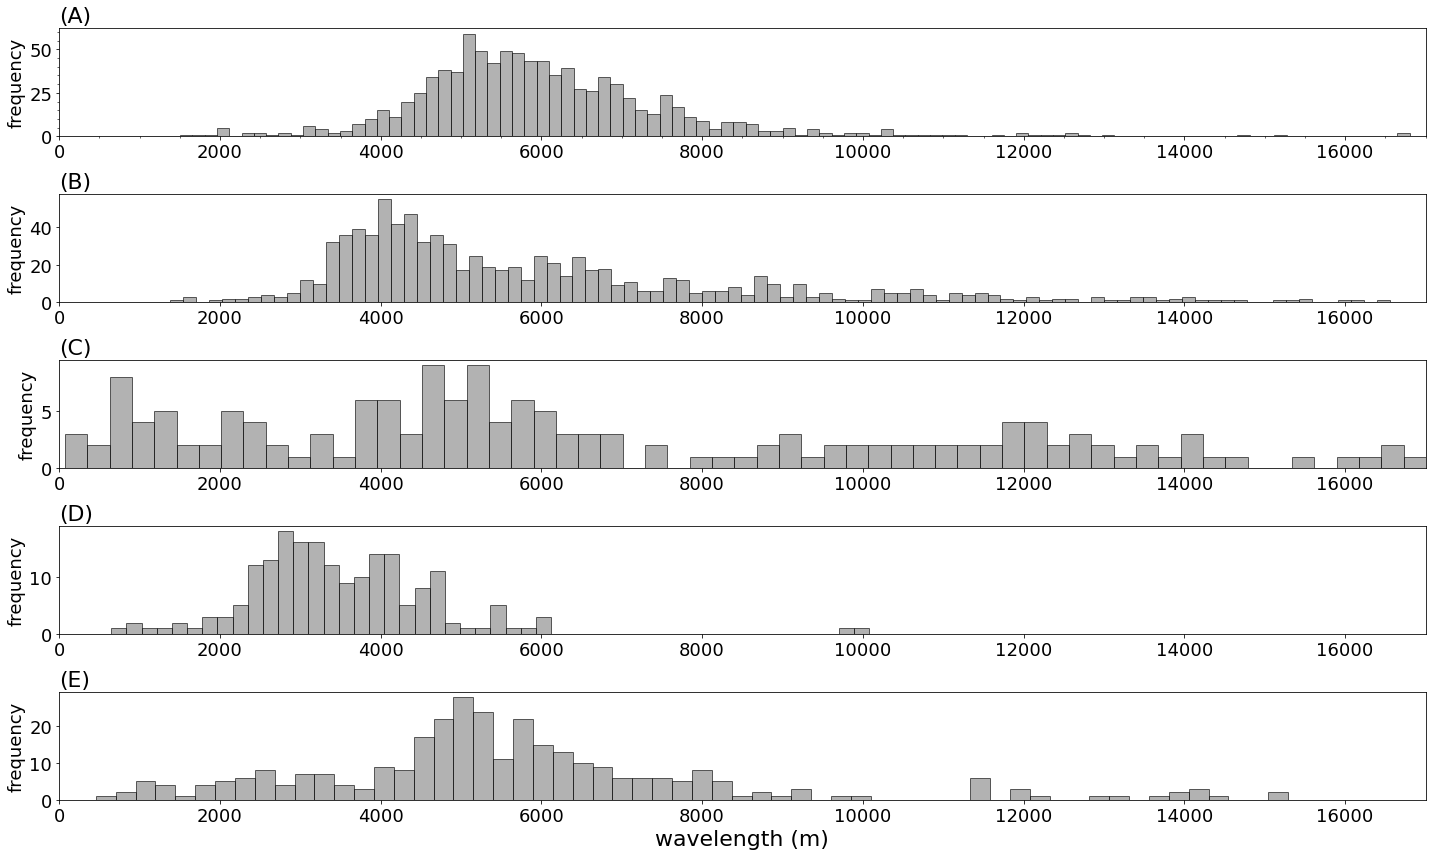

In [473]:
#Histogram plot
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,12),tight_layout=True)
ax1.hist(wvl,bins = 100,edgecolor='black', facecolor='gray', alpha=0.6) #Add range=[x,y] to remove outliers typical range 2-8m 
ax2.hist(wvl_SB,bins = 100,edgecolor='black', facecolor='gray', alpha=0.6)
ax3.hist(wvl_SC,bins = 80,edgecolor='black', facecolor='gray', alpha=0.6)
ax4.hist(wvl_SD,bins = 50,edgecolor='black', facecolor='gray', alpha=0.6)
ax5.hist(wvl_SE,bins = 60,edgecolor='black', facecolor='gray', alpha=0.6)

ax1.set_ylabel('frequency',fontsize=18)
ax2.set_ylabel('frequency',fontsize=18)
ax3.set_ylabel('frequency',fontsize=18)
ax4.set_ylabel('frequency',fontsize=18)
ax5.set_ylabel('frequency',fontsize=18)

ax1.set_title('(A)', loc='left',fontsize=22)
ax2.set_title('(B)', loc='left',fontsize=22)
ax3.set_title('(C)', loc='left',fontsize=22)
ax4.set_title('(D)', loc='left',fontsize=22)
ax5.set_title('(E)', loc='left',fontsize=22)

ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_xlim(0,17000)
ax2.set_xlim(0,17000)
ax3.set_xlim(0,17000)
ax4.set_xlim(0,17000)
ax5.set_xlim(0,17000)

ax5.set_xlabel('wavelength (m)',fontsize=22)

ax1.tick_params(axis='both', which='both', labelsize=18) 
ax2.tick_params(axis='both', which='both', labelsize=18) 
ax3.tick_params(axis='both', which='both', labelsize=18) 
ax4.tick_params(axis='both', which='both', labelsize=18) 
ax5.tick_params(axis='both', which='both', labelsize=18)

#plt.legend(fontsize=22)

plt.savefig('./All Sites extraction wavelengths hist.jpg',dpi=900, transparent=True)
plt.show()

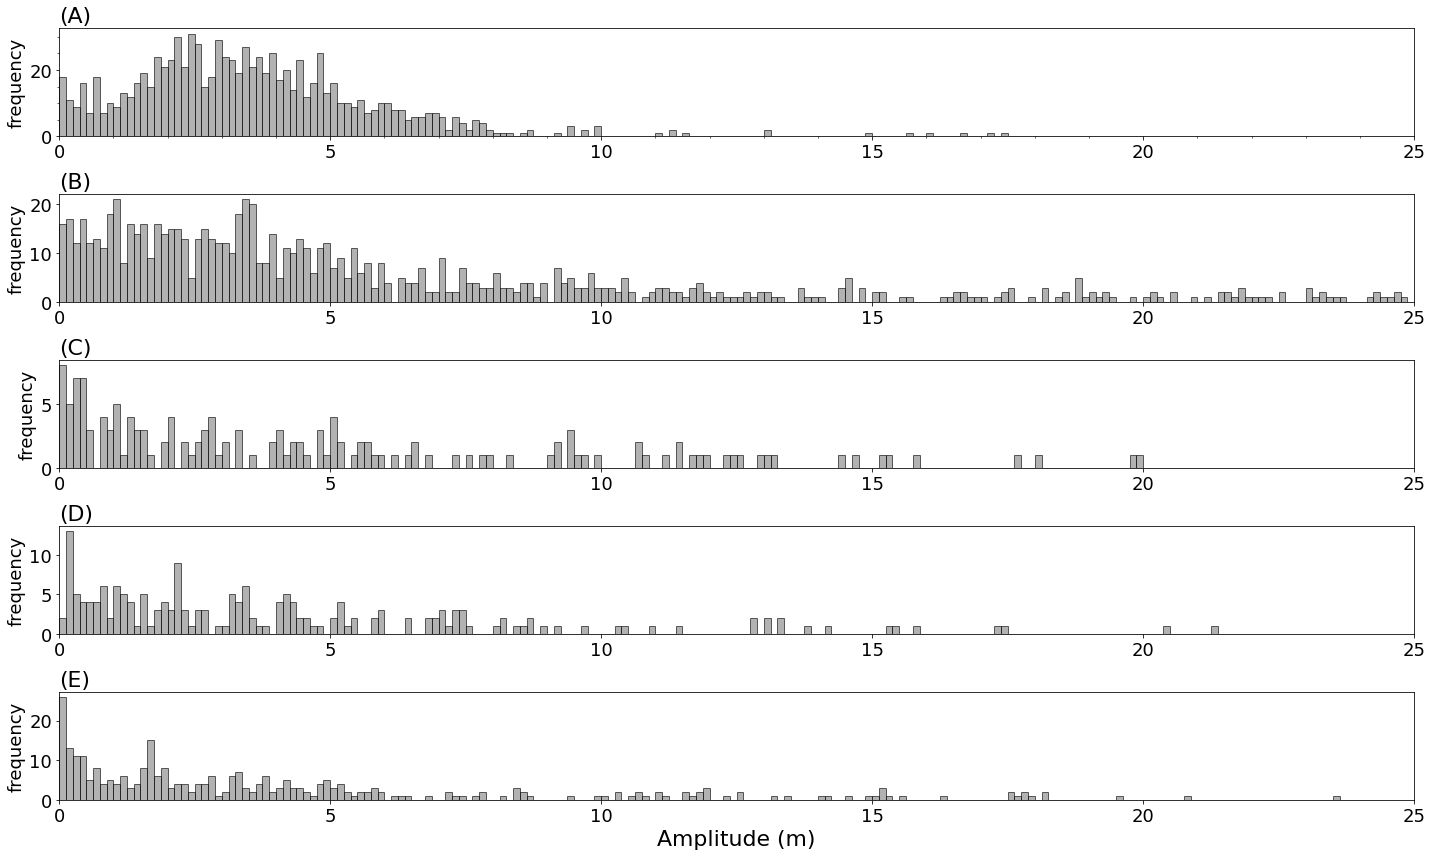

In [474]:
#Histogram plot
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,12),tight_layout=True)
ax1.hist(amp,bins = 200,edgecolor='black', facecolor='gray', alpha=0.6,range=[0,25]) #Add range=[x,y] to remove outliers typical range 2-8m 
ax2.hist(amp_SB,bins = 200,edgecolor='black', facecolor='gray', alpha=0.6,range=[0,25])
ax3.hist(amp_SC,bins = 200,edgecolor='black', facecolor='gray', alpha=0.6,range=[0,25])
ax4.hist(amp_SD,bins = 200,edgecolor='black', facecolor='gray', alpha=0.6,range=[0,25])
ax5.hist(amp_SE,bins = 200,edgecolor='black', facecolor='gray', alpha=0.6,range=[0,25])

ax1.set_ylabel('frequency',fontsize=18)
ax2.set_ylabel('frequency',fontsize=18)
ax3.set_ylabel('frequency',fontsize=18)
ax4.set_ylabel('frequency',fontsize=18)
ax5.set_ylabel('frequency',fontsize=18)

ax1.set_title('(A)', loc='left',fontsize=22)
ax2.set_title('(B)', loc='left',fontsize=22)
ax3.set_title('(C)', loc='left',fontsize=22)
ax4.set_title('(D)', loc='left',fontsize=22)
ax5.set_title('(E)', loc='left',fontsize=22)

ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_xlim(0,25)
ax2.set_xlim(0,25)
ax3.set_xlim(0,25)
ax4.set_xlim(0,25)
ax5.set_xlim(0,25)

ax5.set_xlabel('Amplitude (m)',fontsize=22)

ax1.tick_params(axis='both', which='both', labelsize=18) 
ax2.tick_params(axis='both', which='both', labelsize=18) 
ax3.tick_params(axis='both', which='both', labelsize=18) 
ax4.tick_params(axis='both', which='both', labelsize=18) 
ax5.tick_params(axis='both', which='both', labelsize=18)

#plt.legend(fontsize=22)
plt.savefig('./All Sites extraction amplitudes hist.jpg',dpi=900, transparent=True)
plt.show()

In [402]:
#combined

wvl_combined = []

wvl_combined.append(wvl)
wvl_combined.append(wvl_SB)
wvl_combined.append(wvl_SC)
wvl_combined.append(wvl_SD)
wvl_combined.append(wvl_SE)
    
wvl_combined = list(chain.from_iterable(wvl_combined))
print(len(wvl_combined))

amp_combined = []
amp_combined.append(amp)
amp_combined.append(amp_SB)
amp_combined.append(amp_SC)
amp_combined.append(amp_SD)
amp_combined.append(amp_SE)
    
amp_combined = list(chain.from_iterable(amp_combined))
print(len(amp_combined))

MD_data = list(zip(wvl_combined,amp_combined))

combined_wvl_df = pd.DataFrame(MD_data, columns=['WVL','AMP'])
print(combined_wvl_df)

combined_wvl_df.to_csv('./Combined MD data.csv')

2492
2492
       WVL        AMP
0     5856   1.481201
1     6352   3.482178
2     5616   2.939209
3     5624   2.269287
4     5968   1.598389
...    ...        ...
2487  5328   0.787109
2488  5000   3.337402
2489  4416   5.361572
2490  4840   0.270752
2491  7616  10.298096

[2492 rows x 2 columns]


In [475]:
SEM_wl_com = sem(combined_wvl_df['WVL'])
standard_deviation_wl_com = np.std(combined_wvl_df['WVL'])
print('Wavelengths mean: ', np.mean(combined_wvl_df['WVL']),
      'Wavelengths SEM: ', SEM_wl_com,
      'Wavelengths SD: ', standard_deviation_wl_com,
      'No. of Wavelength points: ',len(combined_wvl_df['WVL']),
      'Q1: ', np.percentile(combined_wvl_df['WVL'], [25]),
      'Q3: ', np.percentile(combined_wvl_df['WVL'], [75]),
      '10%: ', np.percentile(combined_wvl_df['WVL'], [10]),
      '90%: ', np.percentile(combined_wvl_df['WVL'], [90])
         )

print("")
SEM_amp_com = sem(combined_wvl_df['AMP'])
standard_deviation_amp_com = np.std(combined_wvl_df['AMP'])
print('Amplitudes mean: ', np.mean(combined_wvl_df['AMP']),
      'Amplitudes SEM: ', SEM_amp_com,
      'Amplitudes SD: ', standard_deviation_amp_com,
      'No. of Amplitudes points: ',len(combined_wvl_df['AMP']),
      'Q1: ', np.percentile(combined_wvl_df['AMP'], [25]),
      'Q3: ', np.percentile(combined_wvl_df['AMP'], [75]),
      '10%: ', np.percentile(combined_wvl_df['AMP'], [10]),
      '90%: ', np.percentile(combined_wvl_df['AMP'], [90])
         )

Wavelengths mean:  5791.6211878009635 Wavelengths SEM:  51.17111333923119 Wavelengths SD:  2553.9461144232705 No. of Wavelength points:  2492 Q1:  [4224.] Q3:  [6720.] 10%:  [3272.8] 90%:  [8799.2]

Amplitudes mean:  5.34177061910614 Amplitudes SEM:  0.14369508290222313 Amplitudes SD:  7.171809927350241 No. of Amplitudes points:  2492 Q1:  [1.75750732] Q3:  [5.84588623] 10%:  [0.58999023] 90%:  [11.70888672]


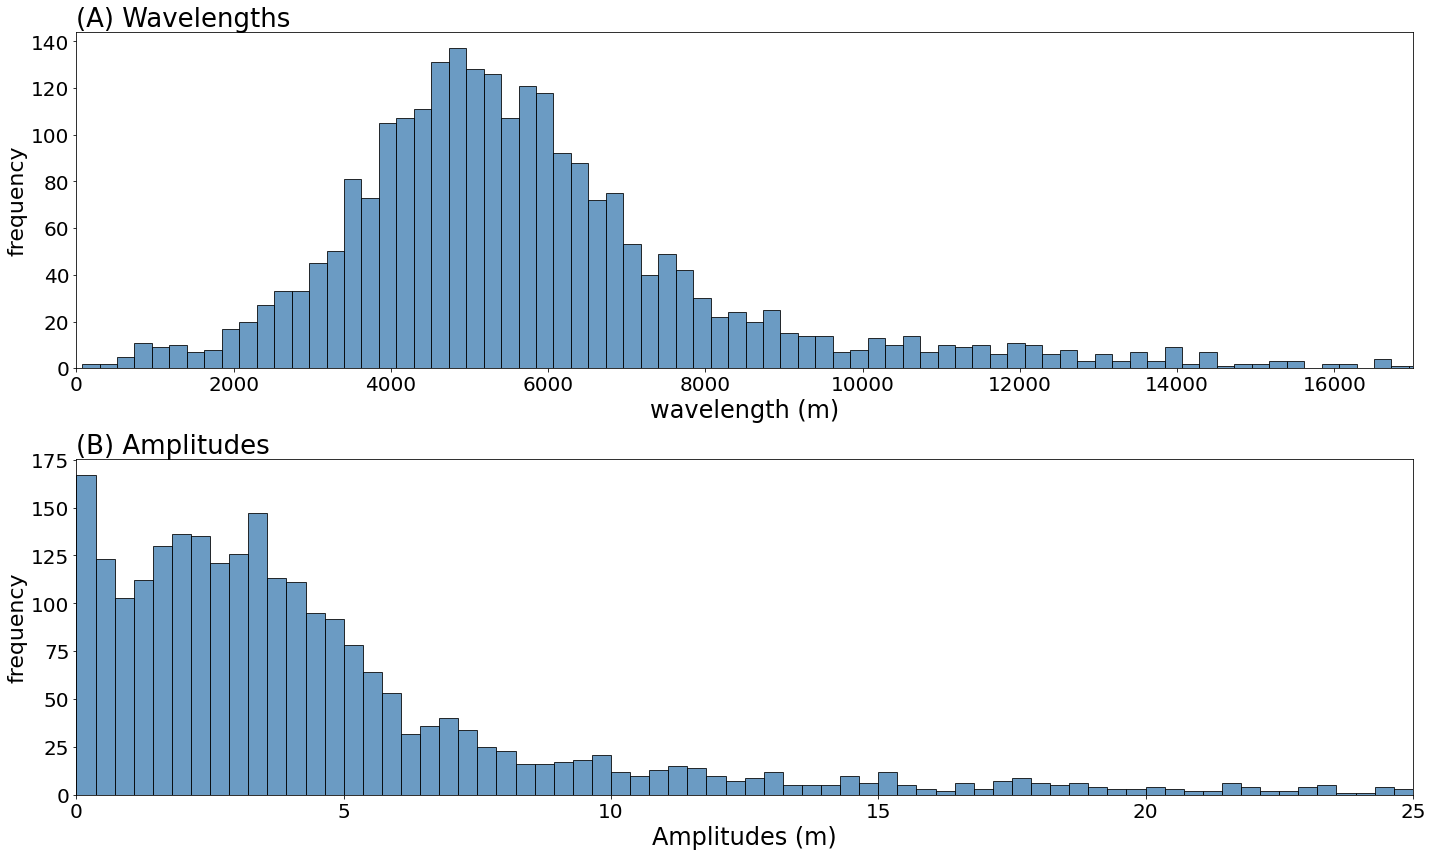

In [469]:
df = pd.read_csv('./Combined MD data.csv')

amp_df = df['AMP']
wvl_df = df['WVL']

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,12),tight_layout=True)

ax1.hist(wvl_df,bins = 100,edgecolor='black', facecolor='steelblue', alpha=0.8)
ax1.set_xlim(0,17000)

ax1.set_xlabel('wavelength (m)',fontsize=24)
ax1.set_ylabel('frequency',fontsize=22)
ax1.tick_params(axis='both', which='both', labelsize=20) 

ax2.hist(amp_df,bins = 70,edgecolor='black', facecolor='steelblue', alpha=0.8, range=[0,25])
ax2.set_xlabel('Amplitudes (m)',fontsize=24)
ax2.set_ylabel('frequency',fontsize=22)
ax2.tick_params(axis='both', which='both', labelsize=20) 
ax2.set_xlim(0,25)

ax1.set_title('(A) Wavelengths', loc='left',fontsize=26)
ax2.set_title('(B) Amplitudes', loc='left',fontsize=26)

plt.savefig('./Combined Sites amplitudes and wavelnegths hist.jpg',dpi=900, transparent=True)
plt.show()

/Users/domhardy/opt/anaconda3/envs/icepyx-env/lib/python3.9/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


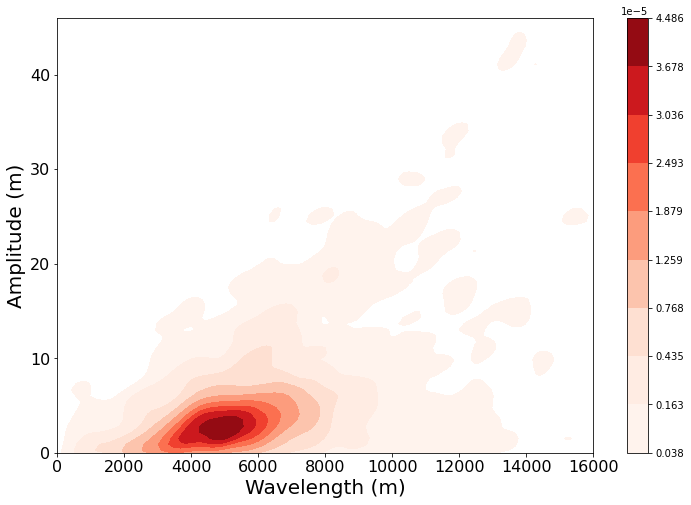

In [470]:
import seaborn as sns

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

sns.kdeplot(x=wvl_df, y=amp_df, cmap="Reds", shade=True, bw_adjust=.5,shade_lowest=False, cbar=True)
plt.ylim(0,46)
plt.xlim(0,16000)
plt.xlabel('Wavelength (m)', fontsize=20)
plt.ylabel('Amplitude (m)', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('./Density plot - Wvl_Amp.png',dpi=300,transparent=True)
plt.show()

In [484]:
import scipy.stats as stats
#perform the Mann-Whitney U test
SA_SB = print('A_B',stats.mannwhitneyu(wvl, wvl_SB,))
SA_SC = print('A_C',stats.mannwhitneyu(wvl, wvl_SC,))
SA_SD = print('A_D',stats.mannwhitneyu(wvl, wvl_SD,))
SA_SE = print('A_E',stats.mannwhitneyu(wvl, wvl_SE,))

SB_SC = print('B_C',stats.mannwhitneyu(wvl_SB, wvl_SC, ))
SB_SD = print('B_D',stats.mannwhitneyu(wvl_SB, wvl_SD, ))
SB_SE = print('B_E',stats.mannwhitneyu(wvl_SB, wvl_SE,))

SC_SD = print('C_D',stats.mannwhitneyu(wvl_SC, wvl_SD,))
SC_SE = print('C_E',stats.mannwhitneyu(wvl_SC, wvl_SE,))

SD_SE = print('D_E',stats.mannwhitneyu(wvl_SD, wvl_SE,))

print("")
######################################
SA_SB = print('A_B',stats.mannwhitneyu(amp, amp_SB, ))
SA_SC = print('A_C',stats.mannwhitneyu(amp, amp_SC, ))
SA_SD = print('A_D',stats.mannwhitneyu(amp, amp_SD, ))
SA_SE = print('A_E',stats.mannwhitneyu(amp, amp_SE, ))

SB_SC = print('B_C',stats.mannwhitneyu(amp_SB, amp_SC, ))
SB_SD = print('B_D',stats.mannwhitneyu(amp_SB, amp_SD, ))
SB_SE = print('B_E',stats.mannwhitneyu(amp_SB, amp_SE, ))

SC_SD = print('C_D',stats.mannwhitneyu(amp_SC, amp_SD,))
SC_SE = print('C_E',stats.mannwhitneyu(amp_SC, amp_SE, ))

SD_SE = print('D_E',stats.mannwhitneyu(amp_SD, amp_SE,))

SD_SE = print('D_E',stats.mannwhitneyu(amp_SE, amp_SE, ))


A_B MannwhitneyuResult(statistic=337367.0, pvalue=4.9203744508963945e-12)
A_C MannwhitneyuResult(statistic=73375.0, pvalue=0.17321019699076085)
A_D MannwhitneyuResult(statistic=13935.5, pvalue=5.7551352808107695e-77)
A_E MannwhitneyuResult(statistic=121791.5, pvalue=1.5146895965180818e-06)
B_C MannwhitneyuResult(statistic=68467.5, pvalue=0.13886706497913298)
B_D MannwhitneyuResult(statistic=27784.5, pvalue=4.750940742592221e-49)
B_E MannwhitneyuResult(statistic=138342.0, pvalue=0.45671827408364374)
C_D MannwhitneyuResult(statistic=8706.5, pvalue=1.1851735789301296e-13)
C_E MannwhitneyuResult(statistic=24334.5, pvalue=0.1491689452933853)
D_E MannwhitneyuResult(statistic=11972.5, pvalue=8.96452384606508e-31)

A_B MannwhitneyuResult(statistic=337980.5, pvalue=7.189027467428716e-12)
A_C MannwhitneyuResult(statistic=68876.5, pvalue=0.01626359293966854)
A_D MannwhitneyuResult(statistic=89542.5, pvalue=0.4068355302663953)
A_E MannwhitneyuResult(statistic=136820.5, pvalue=0.024757800084852098)

In [405]:
# Imports

import geopandas as gpd
from shapely.geometry import Point, box
from random import uniform
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm
from shapely.geometry import shape
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [406]:
# Megadune loc dataframe
MD_combined_x = []
MD_combined_y = []

MD_combined_x.append(MD_coords_df['REMA_x'].values.tolist())
MD_combined_x.append(MD_coords_df_SB['REMA_x'].values.tolist())
MD_combined_x.append(MD_coords_df_SC['REMA_x'].values.tolist())
MD_combined_x.append(MD_coords_df_SD['REMA_x'].values.tolist())
MD_combined_x.append(MD_coords_df_SE['REMA_x'].values.tolist())

MD_combined_y.append(MD_coords_df['REMA_y'].values.tolist())
MD_combined_y.append(MD_coords_df_SB['REMA_y'].values.tolist())
MD_combined_y.append(MD_coords_df_SC['REMA_y'].values.tolist())
MD_combined_y.append(MD_coords_df_SD['REMA_y'].values.tolist())
MD_combined_y.append(MD_coords_df_SE['REMA_y'].values.tolist())

MD_combined_x = list(chain.from_iterable(MD_combined_x))
# print(MD_combined_x)

MD_combined_y = list(chain.from_iterable(MD_combined_y))
# print(MD_combined_y)

                                            geometry
0  MULTILINESTRING ((-1464694.279 -1010839.790, -...


/Users/domhardy/opt/anaconda3/envs/icepyx-env/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


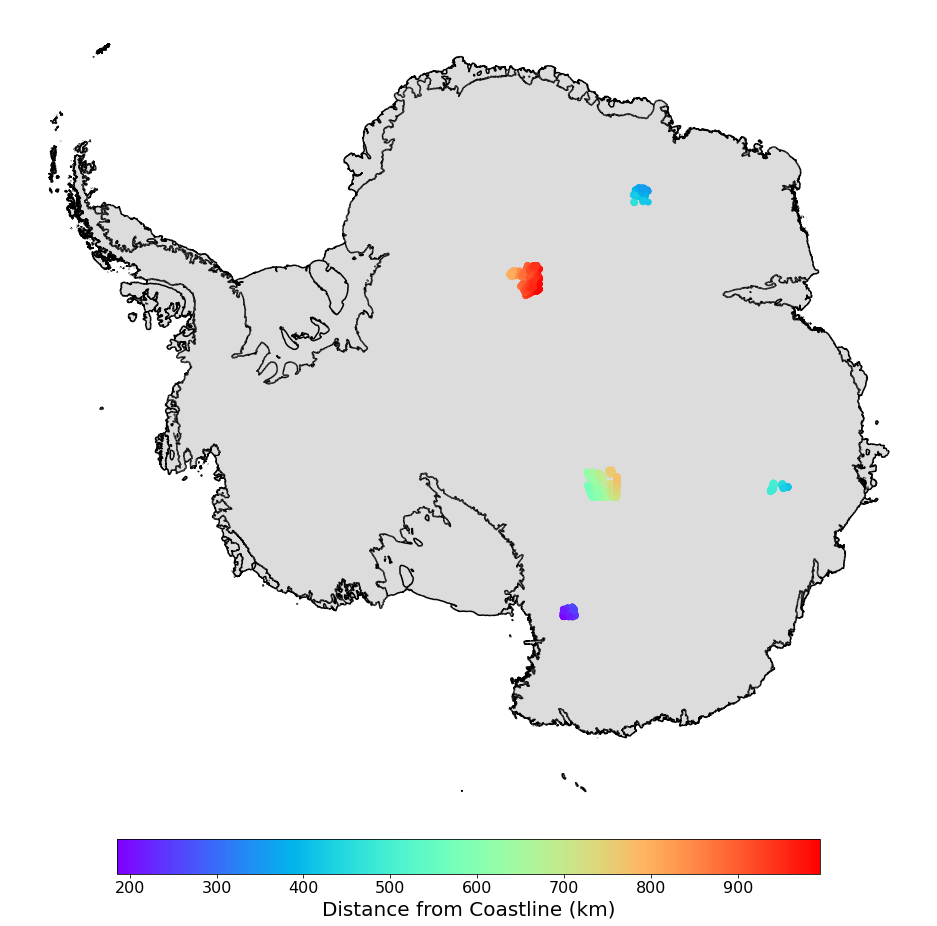

In [464]:
Antartica_poly = unary_union(gpd.read_file("./Quantarctica3/Basemap/ADD_Coastline_low_res_polygon.shp").to_crs('EPSG:3031').geometry)

#single geom for Antartica
Antarctica = Antartica_poly


#single geom for the coastline
coastline = unary_union(gpd.read_file("./Quantarctica3/Basemap/ADD_Coastline_high_res_line_Sliced.shp").to_crs('EPSG:3031').geometry)

x = MD_combined_x
y = MD_combined_y

data = list(zip(x,y))
Fake_df = pd.DataFrame(data, columns=['Longitude','Latitude'])


geometry = []
Dist_coast = []
for i in range(len(MD_combined_x)):
    x = Fake_df.at[i,'Longitude']
    y = Fake_df.at[i,'Latitude']
    point = Point(x,y)
    P_xy = {"geometry": point}
    geometry.append(point)
    P_xy['dist_to_coastline_km'] = (P_xy['geometry'].distance(coastline))/1000
    #print(P_xy['dist_to_coastline_meters'])
    Dist_coast.append(P_xy['dist_to_coastline_km'])
    
data = list(zip(geometry,Dist_coast))
MD_dist_df = pd.DataFrame(data, columns=['geometry','Distance from Coastline (km)'])
#print(MD_dist_df)
#print(len(MD_dist_df))

MD_dist_df_km = MD_dist_df['Distance from Coastline (km)']

# every other distance for wavelengths
# every_other_MD_dist_df = MD_dist_df['Distance from Coastline (m)'][::2]
# print(every_other_MD_dist_df)
# print(len(every_other_MD_dist_df))

gdf = gpd.GeoDataFrame.from_records(MD_dist_df)
#print(gdf)

gdf1 = gpd.GeoDataFrame.from_records([{"geometry":coastline}])
print(gdf1)

ax = gpd.GeoDataFrame.from_records([{"geometry":Antartica_poly}]).plot(figsize=(18,18), color='gainsboro')
ax = gdf1.plot(ax=ax,column='geometry',color='black')
ax = gdf.plot(ax=ax, column='Distance from Coastline (km)', cmap='rainbow',legend=True,
              legend_kwds={'shrink': 0.7,'pad':0.01, 'orientation':'horizontal'})
fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=16)
cb_ax.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax.axis('off')

plt.savefig('./indiv MD recordings Distance from Coastline.jpg', dpi=400)

plt.show()

In [408]:
Dist = gdf['Distance from Coastline (km)']
print(Dist)

0       747.858762
1       747.459248
2       747.212941
3       746.708734
4       746.433746
           ...    
2487    252.645276
2488    251.823639
2489    251.047583
2490    250.531944
2491    216.553413
Name: Distance from Coastline (km), Length: 2492, dtype: float64


In [409]:
Ratio_data = (df['AMP']/df['WVL'])

Ratio = pd.DataFrame(Ratio_data, columns=['Ratio'])
Ratio = Ratio.reset_index()
Ratio = Ratio.drop('index',axis=1)
print(Ratio)

         Ratio
0     0.000253
1     0.000548
2     0.000523
3     0.000404
4     0.000268
...        ...
2487  0.000148
2488  0.000667
2489  0.001214
2490  0.000056
2491  0.001352

[2492 rows x 1 columns]


In [411]:
m, b = np.polyfit(Dist, Ratio, 1)
m2, b2 = np.polyfit(Dist, df['WVL'], 1)
m3, b3 = np.polyfit(Dist, df['AMP'], 1)

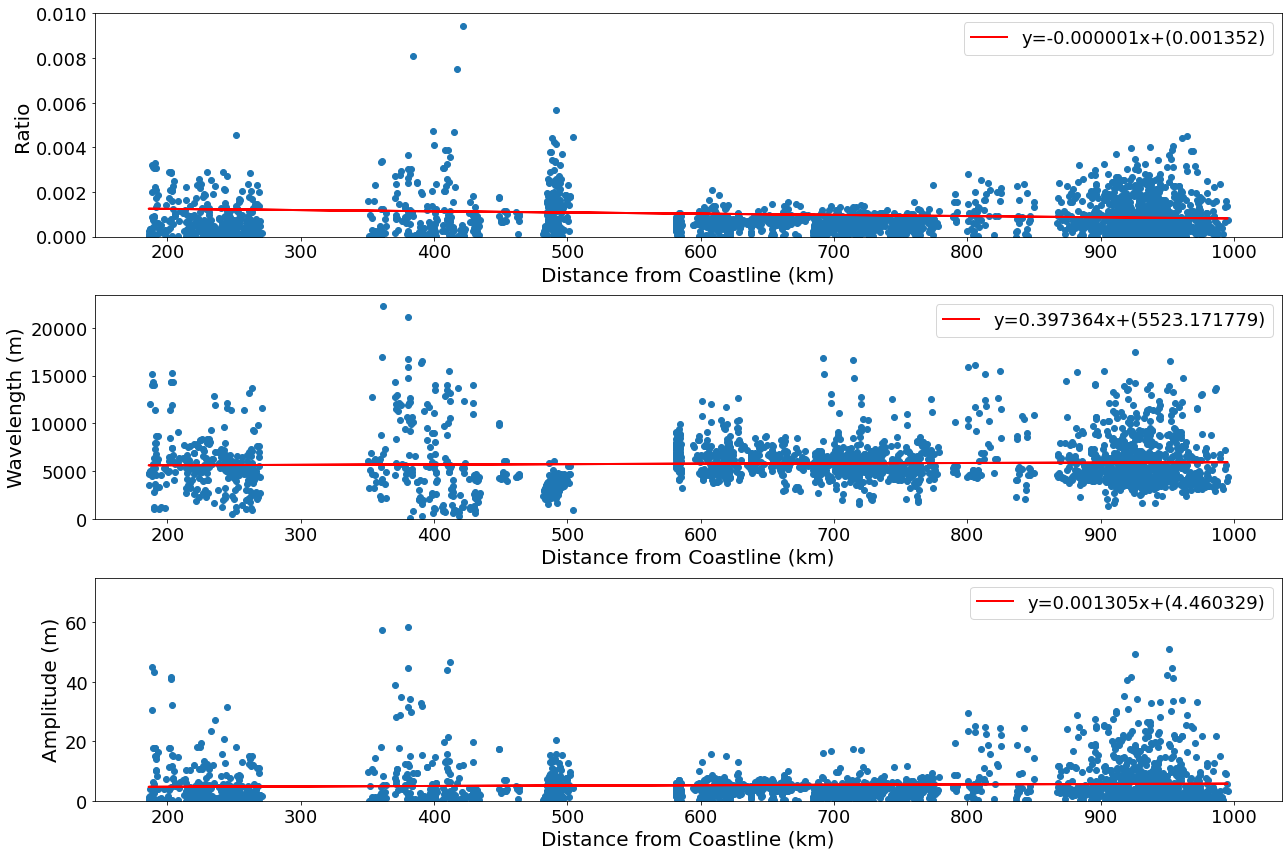

In [432]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,12), tight_layout=True)

ax1.scatter(Dist,Ratio)
ax1.plot(Dist, m*Dist+b, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m,b)))
ax1.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax1.set_ylabel('Ratio', fontsize=20)

ax2.scatter(Dist,df['WVL'])
ax2.plot(Dist, m2*Dist+b2, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m2,b2)))
ax2.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax2.set_ylabel('Wavelength (m)', fontsize=20)

ax3.scatter(Dist,df['AMP'])
ax3.plot(Dist, m3*Dist+b3, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m3,b3)))
ax3.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax3.set_ylabel('Amplitude (m)', fontsize=20)

ax1.tick_params(axis='both', which='both', labelsize=18) 
ax2.tick_params(axis='both', which='both', labelsize=18) 
ax3.tick_params(axis='both', which='both', labelsize=18)

ax1.set_ylim(0,0.01)
ax2.set_ylim(0,)
ax3.set_ylim(0,75)

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
plt.show()

In [458]:
A = np.corrcoef(Dist,df['AMP'] )
B = np.corrcoef(Dist,df['WVL'] )
C = np.corrcoef(Dist, Ratio['Ratio'])

print(A)
print("")
print(B)
print("")
print(C)

[[1.         0.04328656]
 [0.04328656 1.        ]]

[[1.         0.03702022]
 [0.03702022 1.        ]]

[[ 1.         -0.04112168]
 [-0.04112168  1.        ]]


In [457]:
from scipy.stats.stats import pearsonr
A = pearsonr(Dist,df['AMP'] )
B = pearsonr(Dist,df['WVL'] )
C = pearsonr(Dist, Ratio['Ratio'])

print(A)
print("")
print(B)
print("")
print(C)

(0.04328656029292432, 0.03071149259211731)

(0.037020221056006726, 0.06463805144558347)

(-0.041121679973657455, 0.04010848514718126)


                                            geometry
0  MULTILINESTRING ((-1464694.279 -1010839.790, -...


/Users/domhardy/opt/anaconda3/envs/icepyx-env/lib/python3.9/site-packages/geopandas/plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


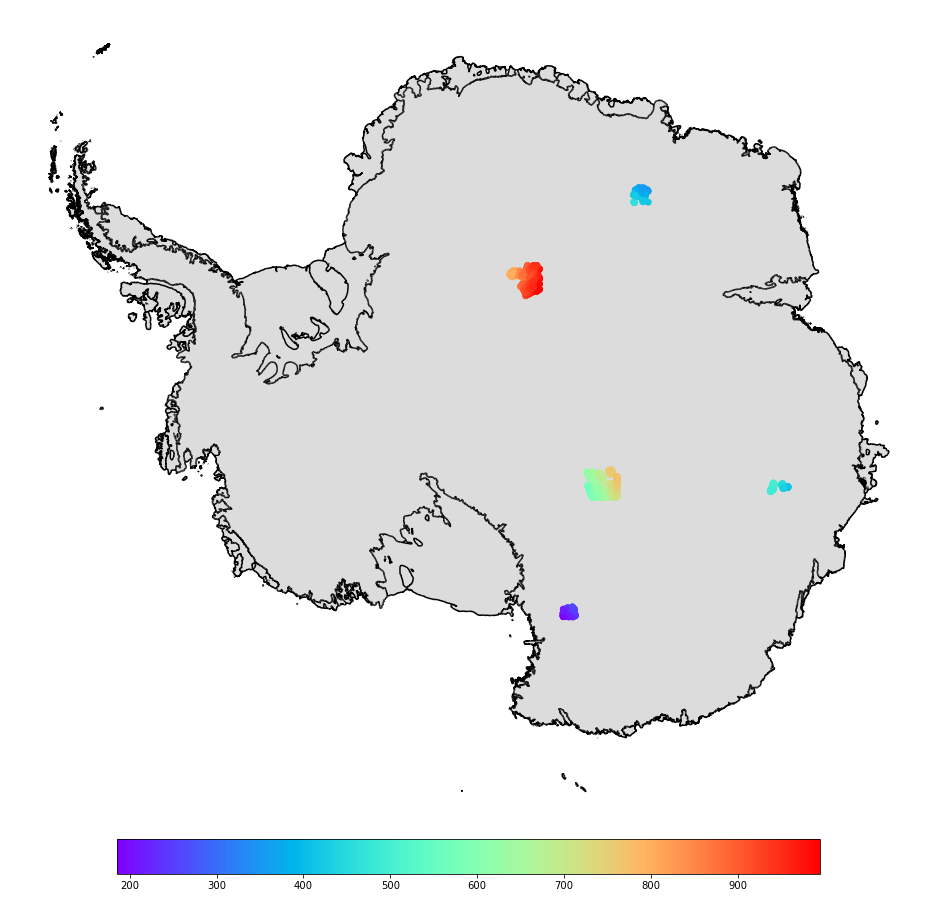

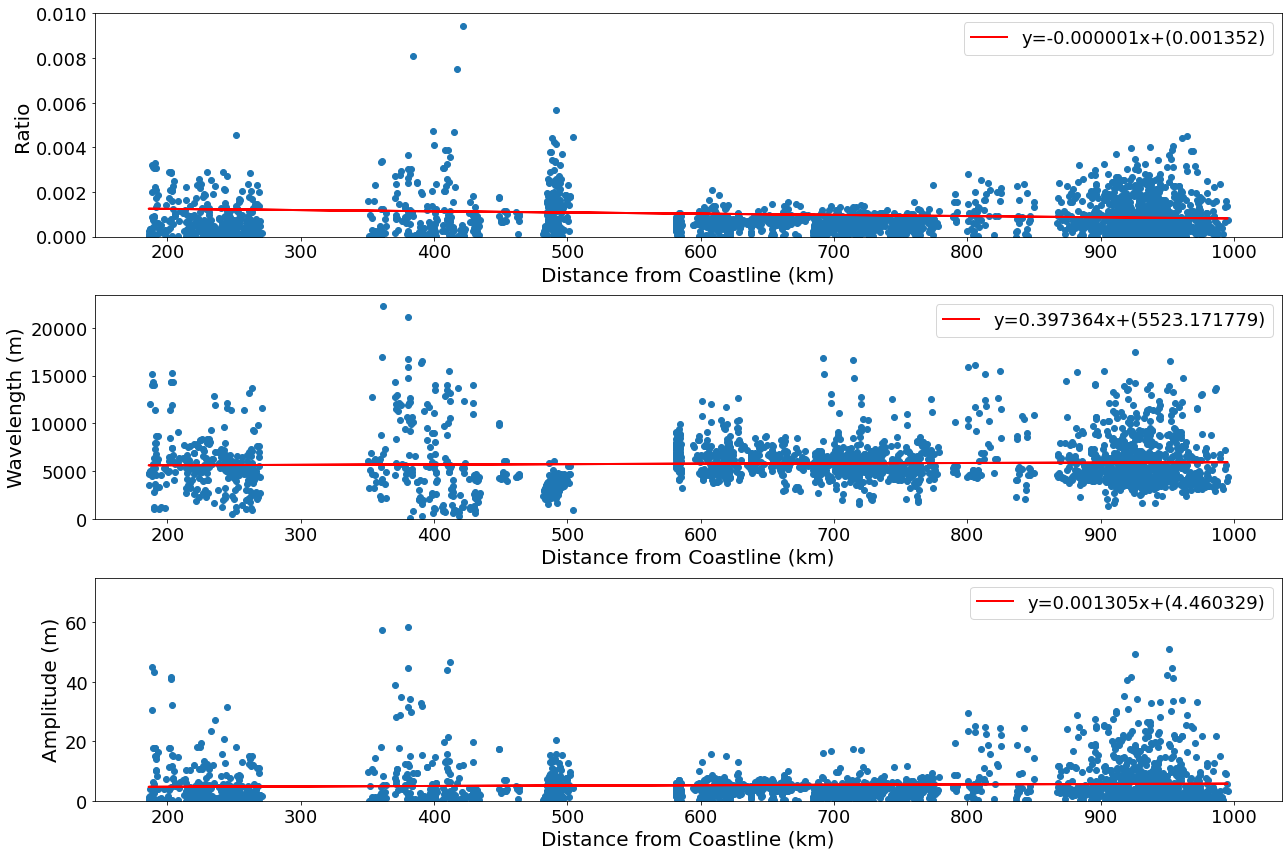

In [463]:
Antartica_poly = unary_union(gpd.read_file("./Quantarctica3/Basemap/ADD_Coastline_low_res_polygon.shp").to_crs('EPSG:3031').geometry)

#single geom for Antartica
Antarctica = Antartica_poly


#single geom for the coastline
coastline = unary_union(gpd.read_file("./Quantarctica3/Basemap/ADD_Coastline_high_res_line_Sliced.shp").to_crs('EPSG:3031').geometry)

x = MD_combined_x
y = MD_combined_y

data = list(zip(x,y))
Fake_df = pd.DataFrame(data, columns=['Longitude','Latitude'])


geometry = []
Dist_coast = []
for i in range(len(MD_combined_x)):
    x = Fake_df.at[i,'Longitude']
    y = Fake_df.at[i,'Latitude']
    point = Point(x,y)
    P_xy = {"geometry": point}
    geometry.append(point)
    P_xy['dist_to_coastline_km'] = (P_xy['geometry'].distance(coastline))/1000
    #print(P_xy['dist_to_coastline_meters'])
    Dist_coast.append(P_xy['dist_to_coastline_km'])
    
data = list(zip(geometry,Dist_coast))
MD_dist_df = pd.DataFrame(data, columns=['geometry','Distance from Coastline (km)'])
#print(MD_dist_df)
#print(len(MD_dist_df))

MD_dist_df_km = MD_dist_df['Distance from Coastline (km)']

# every other distance for wavelengths
# every_other_MD_dist_df = MD_dist_df['Distance from Coastline (m)'][::2]
# print(every_other_MD_dist_df)
# print(len(every_other_MD_dist_df))

gdf = gpd.GeoDataFrame.from_records(MD_dist_df)
#print(gdf)

gdf1 = gpd.GeoDataFrame.from_records([{"geometry":coastline}])
print(gdf1)

ax = gpd.GeoDataFrame.from_records([{"geometry":Antartica_poly}]).plot(figsize=(18,18), color='gainsboro')
ax = gdf1.plot(ax=ax,column='geometry',color='black')
ax = gdf.plot(ax=ax, column='Distance from Coastline (km)', cmap='rainbow',legend=True,
              legend_kwds={'shrink': 0.7,'pad':0.01, 'orientation':'horizontal'})



fig, (ax2,ax3,ax4)=plt.subplots(3,1,figsize=(18,12), tight_layout=True)

cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=16)
cb_ax.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax.axis("off")

ax2.scatter(Dist,Ratio)
ax2.plot(Dist, m*Dist+b, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m,b)))
ax2.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax2.set_ylabel('Ratio', fontsize=20)

ax3.scatter(Dist,df['WVL'])
ax3.plot(Dist, m2*Dist+b2, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m2,b2)))
ax3.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax3.set_ylabel('Wavelength (m)', fontsize=20)

ax4.scatter(Dist,df['AMP'])
ax4.plot(Dist, m3*Dist+b3, color='red', linewidth=2, label=("y=%.6fx+(%.6f)"%(m3,b3)))
ax4.set_xlabel('Distance from Coastline (km)', fontsize=20)
ax4.set_ylabel('Amplitude (m)', fontsize=20)

ax2.tick_params(axis='both', which='both', labelsize=18) 
ax3.tick_params(axis='both', which='both', labelsize=18) 
ax4.tick_params(axis='both', which='both', labelsize=18)

ax2.set_ylim(0,0.01)
ax3.set_ylim(0,)
ax4.set_ylim(0,75)

ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)
plt.savefig('./Correlation Plots.jpg', dpi=400)
plt.show()